## Mutual Fund Analysis

### Installing mftool

In [1]:
!pip install mftool

### Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Mutual Fund Names and their Scheme codes from dataset file

- File with Scheme Codes and their names is being read using mftool.

In [3]:
from mftool import Mftool
MF_obj = Mftool()
all_scheme_codes = MF_obj.get_scheme_codes()
MF_df = pd.DataFrame.from_dict(all_scheme_codes, orient='index')
MF_df.reset_index(inplace=True)
MF_df.columns=['Scheme code','MF Name']
MF_df.head(3)

,Scheme code,MF Name
0,119551,Aditya Birla Sun Life Banking & PSU Debt Fund ...
1,119552,Aditya Birla Sun Life Banking & PSU Debt Fund ...
2,119553,Aditya Birla Sun Life Banking & PSU Debt Fund ...


#### Checking number of MF schemes extracted

In [4]:
MF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Scheme code  14936 non-null  object
 1   MF Name      14936 non-null  object
dtypes: object(2)
memory usage: 116.8+ KB


In [5]:
pd.options.display.max_colwidth=100

#### Commenting this for time being
cond1 = (MF_df['MF Name'].str.contains('Emerging')) \
      & (MF_df['MF Name'].str.contains('Direct')) \
      & (MF_df['MF Name'].str.contains('Growth')) \
      & (~MF_df['MF Name'].str.contains('Series')) \
      & (~MF_df['MF Name'].str.contains('US'))  

#### Extracting certain Mutual Funds based on the conditions

### Change from Markdown to Code for Equity Mutual Funds
# For Equity Mutual Funds 
# change the values like 'Emerging','Large','Small','Mid', 'Micro', 'Banking', 'Pharma', 'Infrastructure', 'Technology' 
# and select the best MFs in the category

weight = {'m1':0.1,'m3':0.3,'m6':0.6,'y1':1,'y3':3,'y5':5}   # Weightage to returns for Equity Mutual Fund

# Select any for MF category 'large','mid','focus',emerging','small','bluechip','pharma','technology','infra','bank','focus'
mf_cat = 'index'

mf_category = MF_df['MF Name'].str.lower().str.contains(mf_cat) 

mf_option = MF_df['MF Name'].str.lower().str.contains('direct')
mf_type = MF_df['MF Name'].str.lower().str.contains('growth')

#mf_exception1 = (~MF_df['MF Name'].str.lower().str.contains('series'))
#mf_exception2 = (~MF_df['MF Name'].str.lower().str.contains('us'))

cond = mf_category & mf_option & mf_type           #& mf_exception1 & mf_exception2  
mf_list = MF_df[cond]

In [6]:
### Change from Markdown to Code for Debt / Liquid Mutual Funds

#for liquid mutual funds
weight = {'m1':5,'m3':3,'m6':1,'y1':0.6,'y3':0.3,'y5':0.1}   # Weightage to returns for Debt based Mutual Fund

mf_cat = 'debt'

mf_category = MF_df['MF Name'].str.lower().str.contains(mf_cat) 
mf_option = MF_df['MF Name'].str.lower().str.contains('direct')
mf_type = MF_df['MF Name'].str.lower().str.contains('growth')

cond = mf_category & mf_option & mf_type            
mf_list = MF_df[cond]

### We may change the weightage to suit our selection criteria

### Displaying extracted MF schemes based on the above condition

In [7]:
display(mf_list)
mf_list.count()

,Scheme code,MF Name
10,119550,Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth
13,120438,Axis Banking & PSU Debt Fund - Direct Plan - Growth Option
27,124175,DSP Banking & PSU Debt Fund - Direct Plan - Growth
39,140286,Edelweiss Banking and PSU Debt Fund - Direct Plan - Growth Option
49,129008,Franklin India Banking & PSU Debt Fund - Direct - Growth
...,...,...
13719,146765,SBI Debt Fund Series C - 49 (1178 Days) - Direct Plan - Growth
13723,146878,SBI Debt Fund Series C - 50 (1177 Days) - Direct Plan - Growth
13727,142177,SBI DEBT FUND SERIES C - 7 (1190 DAYS) - DIRECT PLAN - GROWTH
13732,142332,SBI DEBT FUND SERIES C -8 (1175 DAYS) - DIRECT PLAN - GROWTH


Scheme code    236
MF Name        236
dtype: int64

#### Storing the available details of filtered MF schemes in mf_list

In [8]:
scheme_det = dict(mf_list['Scheme code'].apply(MF_obj.get_scheme_quote))    
mf_list = pd.DataFrame.from_dict(scheme_det,orient='index')
mf_list.head(3)

,scheme_code,scheme_name,last_updated,nav
10,119550,Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth,08-Jun-2021,294.2574
13,120438,Axis Banking & PSU Debt Fund - Direct Plan - Growth Option,08-Jun-2021,2121.2237
27,124175,DSP Banking & PSU Debt Fund - Direct Plan - Growth,08-Jun-2021,19.4174


## Getting historical NAV data for certain schemes

### Flattening nested list from JSON object

Took help from below URL  

https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8

#### Function to Normalize JSON


In [18]:
## For all sorts of MFs except 'debt' mutual funds
def normalize_json(sch_code):
    mf_data = MF_obj.get_scheme_historical_nav(sch_code)
    return pd.json_normalize(
    mf_data, 
    record_path =['data'], 
    meta=[
        'scheme_code','scheme_name','fund_house','scheme_type','scheme_category',
        ['scheme_start_date', 'date'], 
        ['scheme_start_date', 'nav']
    ]  
      
)    

### Calling the function to flatten nested list from JSON object

In [19]:
first_item = mf_list.iloc[0,0]
df = normalize_json(sch_code = first_item) # calling the function to flatten nested list

mf_df = df.copy()   

for i in mf_list['scheme_code']:
    if i== first_item:
        continue
    try:
        df = normalize_json(sch_code=i)
        mf_df = mf_df.append(df)
    except:
        continue
mf_df.sample(3)

,date,nav,scheme_code,scheme_name,fund_house,scheme_type,scheme_category,scheme_start_date.date,scheme_start_date.nav
581,16-08-2018,10.66190,141524,SBI DEBT FUND SERIES C - 1 (1100 DAYS) - DIRECT PLAN - GROWTH,SBI Mutual Fund,IL&FS Mutual Fund,IDF,03-07-2018,10.53660
1473,06-05-2015,12.47230,119795,L&T Banking and PSU Debt Fund - Direct Plan - Growth,L&T Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,02-01-2013,10.25510
879,16-10-2017,14.51390,121279,IDFC-IDFC Banking & PSU Debt Fund - Direct Growth,IDFC Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,08-03-2013,10.00320


### Checking number of available observations & their data types for various filtered MF schemes 

In [20]:
mf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119449 entries, 0 to 869
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date                    119449 non-null  object
 1   nav                     119449 non-null  object
 2   scheme_code             119449 non-null  object
 3   scheme_name             119449 non-null  object
 4   fund_house              119449 non-null  object
 5   scheme_type             119449 non-null  object
 6   scheme_category         119449 non-null  object
 7   scheme_start_date.date  119449 non-null  object
 8   scheme_start_date.nav   119449 non-null  object
dtypes: object(9)
memory usage: 5.0+ MB


### Converting certain data types into appropriate data types

In [21]:
import datetime
from datetime import date

In [22]:
mf_df['date']=pd.to_datetime(mf_df['date'],format='%d-%m-%Y')
mf_df['scheme_start_date.date']=pd.to_datetime(mf_df['scheme_start_date.date'],format='%d-%m-%Y')

In [23]:
mf_df['nav']=mf_df['nav'].astype(float)
mf_df['scheme_start_date.nav']=mf_df['scheme_start_date.nav'].astype(float)

In [24]:
mf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119449 entries, 0 to 869
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    119449 non-null  datetime64[ns]
 1   nav                     119449 non-null  float64       
 2   scheme_code             119449 non-null  object        
 3   scheme_name             119449 non-null  object        
 4   fund_house              119449 non-null  object        
 5   scheme_type             119449 non-null  object        
 6   scheme_category         119449 non-null  object        
 7   scheme_start_date.date  119449 non-null  datetime64[ns]
 8   scheme_start_date.nav   119449 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 6.8+ MB


In [25]:
mf_df.sample(5)

,date,nav,scheme_code,scheme_name,fund_house,scheme_type,scheme_category,scheme_start_date.date,scheme_start_date.nav
1753,2014-02-20,16.6476,120338,LIC MF Banking & PSU Debt Fund-Direct Plan-Growth,LIC Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,2013-01-03,15.1721
425,2019-09-03,47.2087,119118,HDFC Hybrid Debt Fund - Growth Option - Direct Plan,HDFC Mutual Fund,Open Ended Schemes,Hybrid Scheme - Conservative Hybrid Fund,2013-01-01,26.4746
232,2020-06-25,29.1928,120048,HSBC Flexi Debt Fund - Growth Direct,HSBC Mutual Fund,Open Ended Schemes,Debt Scheme - Dynamic Bond,2013-01-15,16.0876
579,2019-01-14,1576.4433,120444,Invesco India Banking & PSU Debt Fund - Direct Plan - Growth Option,Invesco Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,2013-01-02,1003.7546
1800,2013-12-13,40.2236,119075,HDFC Dynamic Debt Fund - Growth Option - Direct Plan,HDFC Mutual Fund,Open Ended Schemes,Debt Scheme - Dynamic Bond,2013-01-01,38.4715


### Function to get Latest NAV date and NAV value available in the Dataset

In [26]:
def latest_NAV(scheme_code):   
  
    latest_nav_dt = pd.to_datetime(mf_list[mf_list['scheme_code']==str(scheme_code)]['last_updated'].values[0],format='%d-%b-%Y')
    latest_nav = mf_list[mf_list['scheme_code']==str(scheme_code)]['nav'].values[0]
    return latest_nav_dt,latest_nav    

In [27]:
mf_list.head(3)

,scheme_code,scheme_name,last_updated,nav
10,119550,Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth,08-Jun-2021,294.2574
13,120438,Axis Banking & PSU Debt Fund - Direct Plan - Growth Option,08-Jun-2021,2121.2237
27,124175,DSP Banking & PSU Debt Fund - Direct Plan - Growth,08-Jun-2021,19.4174


### Removing unsolicited values from mf_list

In [28]:
NA_list = mf_list[(mf_list['nav']=='N.A.') | (mf_list['nav']=='0.0000')].index.to_list()
mf_list.drop(NA_list,inplace=True)
#mf_list[(mf_list['nav']=='N.A.') | (mf_list['nav']=='0.0000')]

,scheme_code,scheme_name,last_updated,nav


In [29]:
from datetime import *

### Setting the index of the DataFrame to scheme code and date

In [30]:
mf_df.set_index(['scheme_code','date'],inplace=True)

In [31]:
mf_df.sample(5)

,,nav,scheme_name,fund_house,scheme_type,scheme_category,scheme_start_date.date,scheme_start_date.nav
scheme_code,date,,,,,,,
120444,2014-05-07,1119.7715,Invesco India Banking & PSU Debt Fund - Direct Plan - Growth Option,Invesco Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,2013-01-02,1003.7546
146174,2019-10-28,10.9055,SBI Debt Fund Series C - 38 (1224 Days) - Direct Plan - Growth,SBI Mutual Fund,IL&FS Mutual Fund,IDF,2019-01-30,10.0131
127850,2020-01-31,14.8424,BOIAXAEQUITY DEBT REBALANCER FUND DIRECT PLAN GROWTH,BOI AXA Mutual Fund,Open Ended Schemes,Hybrid Scheme - Dynamic Asset Allocation or Balanced Advantage,2014-03-24,10.0461
136465,2020-11-13,15.6423,HDFC Retirement Savings Fund - Hybrid-Debt Plan - Growth Option - Direct Plan,HDFC Mutual Fund,Open Ended Schemes,Solution Oriented Scheme - Retirement Fund,2016-02-26,10.0220
120256,2018-11-22,20.8074,ICICI Prudential Banking and PSU Debt Fund - Direct Plan - Growth,ICICI Prudential Mutual Fund,Open Ended Schemes,Debt Scheme - Banking and PSU Fund,2013-03-14,12.8915


### Function to get MF NAV for the desired date from the Dataset

In [32]:
from datetime import datetime
  
def MF_nav(df,scheme_code,nav_date): 
    
    sch_start_date = df.loc[scheme_code]['scheme_start_date.date'].values[0]
    sch_start_date1 = pd.to_datetime(sch_start_date,format='%d-%m-%Y').date()
    nav_date1 = pd.to_datetime(nav_date,format='%d-%m-%Y').date() 
    
    nav=0.0
    
    if (nav_date1 <= sch_start_date1):
        nav = df.loc[scheme_code]['scheme_start_date.nav'].values[0]
        nav_date = sch_start_date
    else:                         
        while nav==0.0:
            try:
                nav = df.loc[scheme_code].loc[nav_date]['nav'].values[0]
                break
            except:
                nav_date1 = nav_date1 - timedelta(days=1) 
                nav_date = nav_date1.strftime("%d-%m-%Y")
    return nav_date,nav
 

### Formula for calculating CAGR is given below:

CAGR = [(FV / PV) ^ (1/t)] - 1

- t is time in years
- FV is future value
- PV is present value

In [33]:
def CAGR_MF(scheme_code,df,after_days):        
    latest_nav_dt,FV = latest_NAV(scheme_code)
    #print('Value of FV is',FV,'  and its data type is ',type(FV))
    latest_nav_dt = pd.to_datetime(latest_nav_dt,format='%d-%m-%Y').date()
    past_date =  (latest_nav_dt - timedelta(days=after_days)).strftime("%d-%m-%Y")    
    sch_start_date = df.loc[scheme_code]['scheme_start_date.date'].values[0]
    
    past_date1 = pd.to_datetime(past_date,format='%d-%m-%Y').date()
    sch_start_date1 = pd.to_datetime(sch_start_date,format='%d-%m-%Y').date()
    
    try:
        FV=float(FV)
        condition=True
    except:
        condition=False
        
    if((past_date1<sch_start_date1) | (condition==False)):
        CAGR = np.nan
    else:
        
        nav_date,PV = MF_nav(df,scheme_code,past_date)            
        t = float(after_days/365)
        CAGR = (((FV/PV)**(1/t))-1)*100
    return CAGR

#### Creating another column in mf_list with integer scheme_code

In [34]:
mf_list['sch_code']=mf_list['scheme_code'].astype(int)
mf_list.set_index('sch_code',inplace=True)

## calculating returns for 1 month, 3 months, 6 months, 1 yr, 3 yrs & 5 years



### Why the following code is not working 

In [ ]:
#mf_list.loc['m1']=mf_list['sch_code'].apply(CAGR_MF,mf_df,30)

In [35]:
mf_list

,scheme_code,scheme_name,last_updated,nav
sch_code,,,,
119550,119550,Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth,08-Jun-2021,294.2574
120438,120438,Axis Banking & PSU Debt Fund - Direct Plan - Growth Option,08-Jun-2021,2121.2237
124175,124175,DSP Banking & PSU Debt Fund - Direct Plan - Growth,08-Jun-2021,19.4174
140286,140286,Edelweiss Banking and PSU Debt Fund - Direct Plan - Growth Option,08-Jun-2021,19.8547
129008,129008,Franklin India Banking & PSU Debt Fund - Direct - Growth,08-Jun-2021,18.2808
...,...,...,...,...
146765,146765,SBI Debt Fund Series C - 49 (1178 Days) - Direct Plan - Growth,08-Jun-2021,12.1318
146878,146878,SBI Debt Fund Series C - 50 (1177 Days) - Direct Plan - Growth,08-Jun-2021,12.0768
142177,142177,SBI DEBT FUND SERIES C - 7 (1190 DAYS) - DIRECT PLAN - GROWTH,06-Apr-2021,12.6118


### Iterating to calculate various CAGR values for various time periods

In [36]:
for i in mf_list.index:    
    mf_list.loc[i,'m1']=CAGR_MF(i,mf_df,30)
    mf_list.loc[i,'m3']=CAGR_MF(i,mf_df,90)
    mf_list.loc[i,'m6']=CAGR_MF(i,mf_df,180)
    mf_list.loc[i,'y1']=CAGR_MF(i,mf_df,365)
    mf_list.loc[i,'y3']=CAGR_MF(i,mf_df,1095)
    mf_list.loc[i,'y5']=CAGR_MF(i,mf_df,1825)  


### Calculating the score based on assigned weightage for returns during specific time duration


In [37]:
for i in mf_list.index:
    total_weight = 0.0
    value=0.0
    for j in weight.keys():
        if (~np.isnan(mf_list.loc[i,j])):
            total_weight = total_weight + weight[j]            
            value = value + mf_list.loc[i,j]*weight[j]
    try:
        mf_list.loc[i,'Score']= value/total_weight
    except:
        continue

### Printing the sorted list of Selected Mutual Fund schemes

In [38]:
mf_list.sort_values(by=['Score','y5','y3','y1','m6','m3','m1'],ascending=False)

,scheme_code,scheme_name,last_updated,nav,m1,m3,m6,y1,y3,y5,Score
sch_code,,,,,,,,,,,
139527,139527,BOI AXA MID & SMALL CAP EQUITY & DEBT FUND - DIRECT PLAN GROWTH,08-Jun-2021,20.55,164.682174,11.856890,104.524840,56.750572,13.244850,NaN,101.164665
120251,120251,ICICI Prudential Equity & Debt Fund - Direct Plan - Growth,08-Jun-2021,203.34,142.052811,5.315094,127.004847,47.177186,13.108409,13.233825,88.677640
145994,145994,SBI Debt Fund Series C - 36 (365 Days) - Direct Plan - Growth,02-Jan-2020,10.8223,115.358124,24.788593,8.797915,NaN,NaN,NaN,73.328257
119118,119118,HDFC Hybrid Debt Fund - Growth Option - Direct Plan,08-Jun-2021,58.8038,51.811992,1.839479,36.571295,18.392543,9.369951,7.884590,31.578466
120154,120154,Kotak Debt Hybrid - Growth - Direct,08-Jun-2021,44.1442,45.439006,2.074203,32.958636,18.418271,11.662901,9.668150,28.189292
...,...,...,...,...,...,...,...,...,...,...,...
133856,133856,SBI DEBT FUND SERIES B - 7 (38 MONTHS) - DIRECT PLAN - GROWTH,19-Apr-2018,12.7236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134313,134313,SBI DEBT FUND SERIES B - 8 (1105 DAYS) - DIRECT PLAN - GROWTH,04-Apr-2018,12.7590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134320,134320,SBI DEBT FUND SERIES B - 9 (1105 DAYS) - DIRECT PLAN - GROWTH,09-Apr-2018,12.7055,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping the MFs which are less than 5 years old

In [39]:
sel_mf=mf_list.dropna(axis=0)

#### Sorting the MF schemes based on Score followed by CAGR of various durations from long term to short term

In [40]:
sel_mf = sel_mf.sort_values(by=['Score','y5','y3','y1','m6','m3','m1'],ascending=False)

#### Saving entire sorted list of filtered MF schemes to a XLSX file

In [41]:
file_name='P:/DataS/MFChoice-'+mf_cat+'.xlsx'
sel_mf.to_excel(file_name)

In [42]:
mf_df.reset_index(inplace=True)
mf_df.set_index('scheme_code',inplace=True)

## Plotting MF NAVs for various schemes

In [43]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

In [44]:
sel_mf.set_index('scheme_name',inplace=True)

<AxesSubplot:xlabel='scheme_name'>

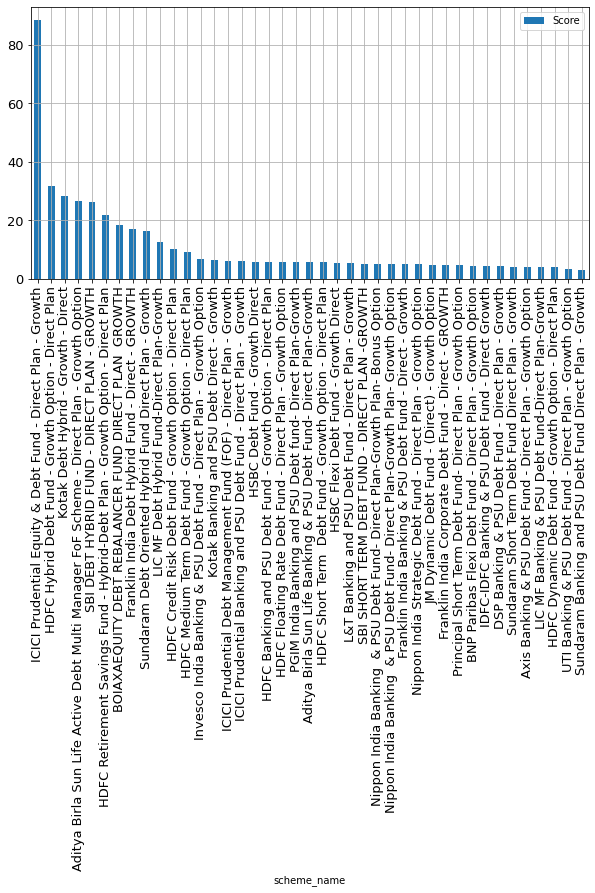

In [45]:
sel_mf['Score'].plot(kind='bar',stacked=False,figsize=(10,5), fontsize=13, grid=True,legend=True)

<AxesSubplot:xlabel='scheme_name'>

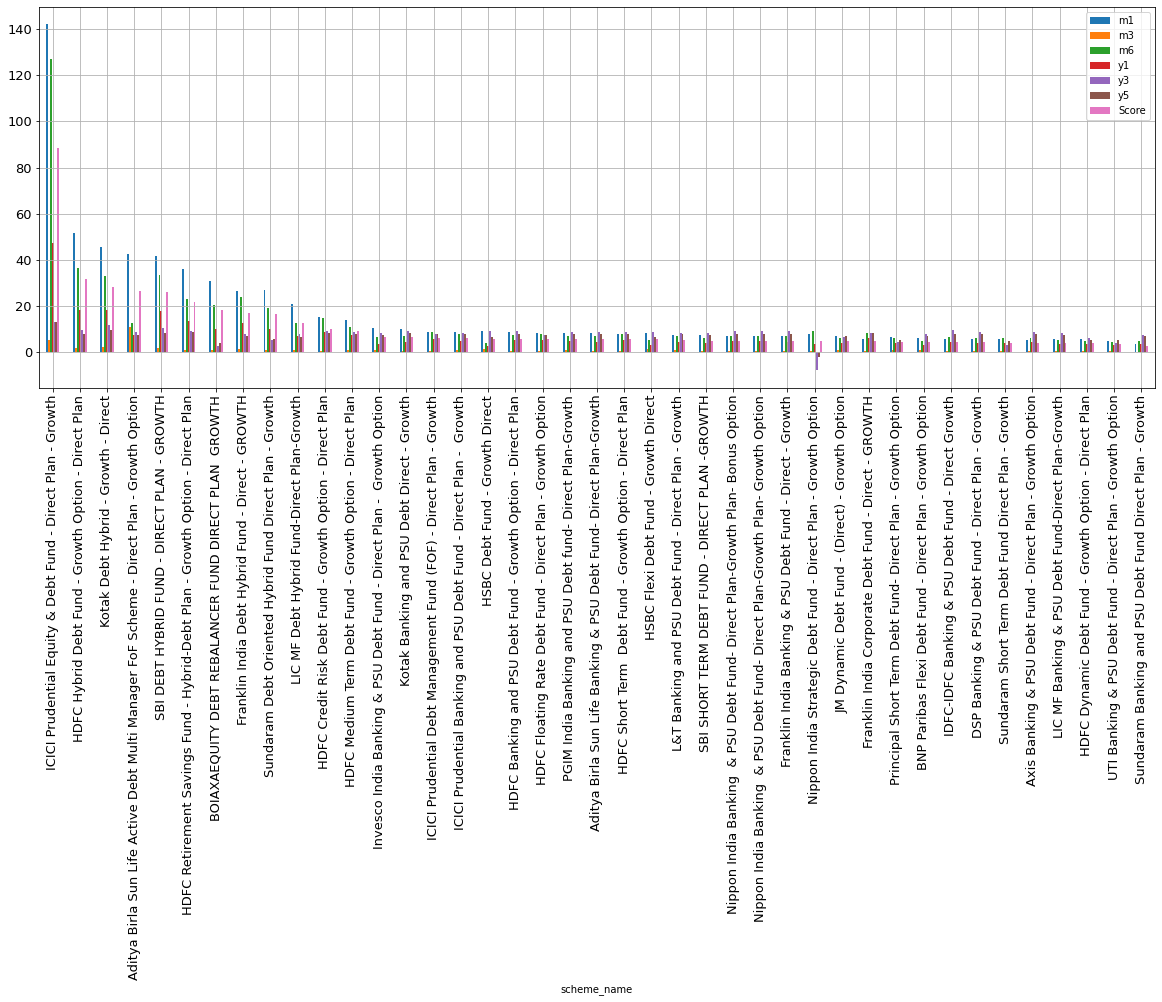

In [46]:
import matplotlib as plt
plt.figsize=(20,20)
sel_mf.plot(kind='bar',stacked=False,figsize=(20,7), fontsize=13, grid=True,legend=True)

### Selecting top 7 out of the above list

In [47]:
sel_mf = sel_mf.iloc[0:7]
sel_mf.reset_index(inplace=True)

In [48]:
sel_mf.set_index('scheme_code',inplace=True)
sel_mf

,scheme_name,last_updated,nav,m1,m3,m6,y1,y3,y5,Score
scheme_code,,,,,,,,,,
120251,ICICI Prudential Equity & Debt Fund - Direct Plan - Growth,08-Jun-2021,203.34,142.052811,5.315094,127.004847,47.177186,13.108409,13.233825,88.677640
119118,HDFC Hybrid Debt Fund - Growth Option - Direct Plan,08-Jun-2021,58.8038,51.811992,1.839479,36.571295,18.392543,9.369951,7.884590,31.578466
120154,Kotak Debt Hybrid - Growth - Direct,08-Jun-2021,44.1442,45.439006,2.074203,32.958636,18.418271,11.662901,9.668150,28.189292
131898,Aditya Birla Sun Life Active Debt Multi Manager FoF Scheme - Direct Plan - Growth Option,08-Jun-2021,31.2796,42.669926,10.909411,12.383305,7.210771,8.539834,7.393818,26.608896
119839,SBI DEBT HYBRID FUND - DIRECT PLAN - GROWTH,08-Jun-2021,53.3356,41.755155,1.842758,33.191418,17.612710,10.343646,8.344180,26.200061
136465,HDFC Retirement Savings Fund - Hybrid-Debt Plan - Growth Option - Direct Plan,08-Jun-2021,17.0668,35.868853,0.807221,22.966834,13.611279,8.987875,8.770042,21.647289
127850,BOIAXAEQUITY DEBT REBALANCER FUND DIRECT PLAN GROWTH,08-Jun-2021,16.6081,30.653141,0.758114,20.408133,9.969210,2.497279,3.977992,18.307669


In [49]:
top_mf = mf_df[mf_df.index.isin(sel_mf.index)]

### Checking fluctuations / volatility in selected MFs with higher score

In [50]:
from matplotlib import *
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

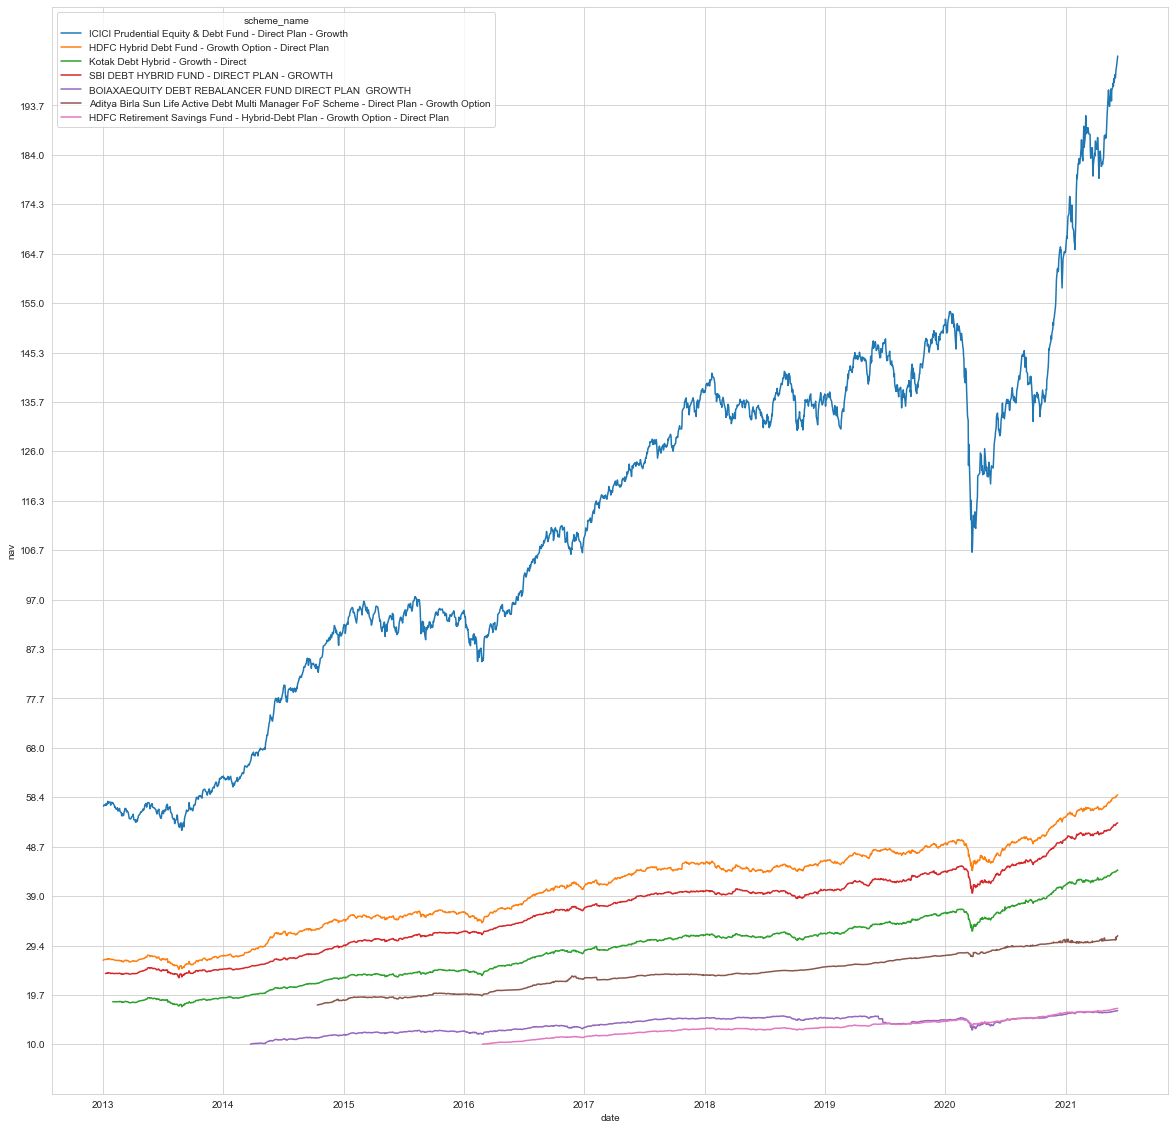

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))

y_min = top_mf['nav'].min()
y_max = top_mf['nav'].max()

y_ticks = np.arange(y_min, y_max, ((y_max-y_min)/20))
plt.yticks(y_ticks)

sns.lineplot(x='date',y='nav',data=top_mf,hue='scheme_name',markers=True)

fig_name = 'P:/DataS/MFChoice-'+ mf_cat +'.png'
plt.savefig(fig_name)